In [1]:
import numpy as np
from PIL import Image
import cv2
from PIL import ImageOps
import PIL



#Get the source image
src_img = Image.open('left_rectified.png')
src_img.show()
#src_img = cv2.imread('left_rectified.png', 0)
src_img =PIL.ImageOps.grayscale(src_img)
w, h = src_img.size
print('image size: %d x %d = %d' % (w, h, w * h))
print('image mode:', src_img.mode)

#Convert image to Numpy array
src_bytes = np.asarray(src_img)

#Initialize output array
census = np.zeros((h-2, w-2), dtype='uint8')

#centre pixels, which are offset by (1, 1)
cp = src_bytes[1:h-1, 1:w-1]

#offsets of non-central pixels 
offsets = [(u, v) for v in range(3) for u in range(3) if not u == 1 == v]

#Do the pixel comparisons
for u,v in offsets:
    census = (census << 1) | (src_bytes[v:v+h-2, u:u+w-2] >= cp)

#Convert transformed data to image
out_img1 = Image.fromarray(census)


image size: 1032 x 778 = 802896
image mode: L


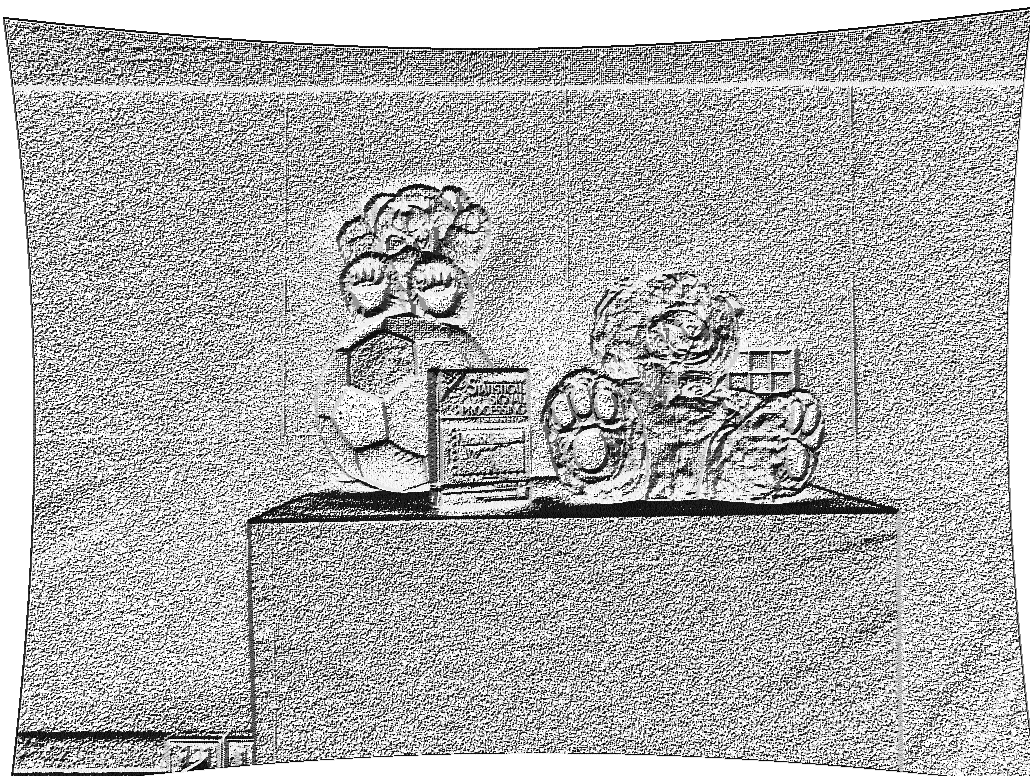

In [12]:
out_img1

In [16]:
import numpy as np
from PIL import Image
import cv2
from PIL import ImageOps



#Get the source image
src_img = Image.open('right_rectified.png')
src_img.show()
#src_img = cv2.imread('left_rectified.png', 0)
src_img =PIL.ImageOps.grayscale(src_img)
w, h = src_img.size
print('image size: %d x %d = %d' % (w, h, w * h))
print('image mode:', src_img.mode)

#Convert image to Numpy array
src_bytes = np.asarray(src_img)

#Initialize output array
census = np.zeros((h-2, w-2), dtype='uint8')

#centre pixels, which are offset by (1, 1)
cp = src_bytes[1:h-1, 1:w-1]

#offsets of non-central pixels 
offsets = [(u, v) for v in range(3) for u in range(3) if not u == 1 == v]

#Do the pixel comparisons
for u,v in offsets:
    census = (census << 1) | (src_bytes[v:v+h-2, u:u+w-2] >= cp)

#Convert transformed data to image
out_img2 = Image.fromarray(census)


image size: 1032 x 778 = 802896
image mode: L


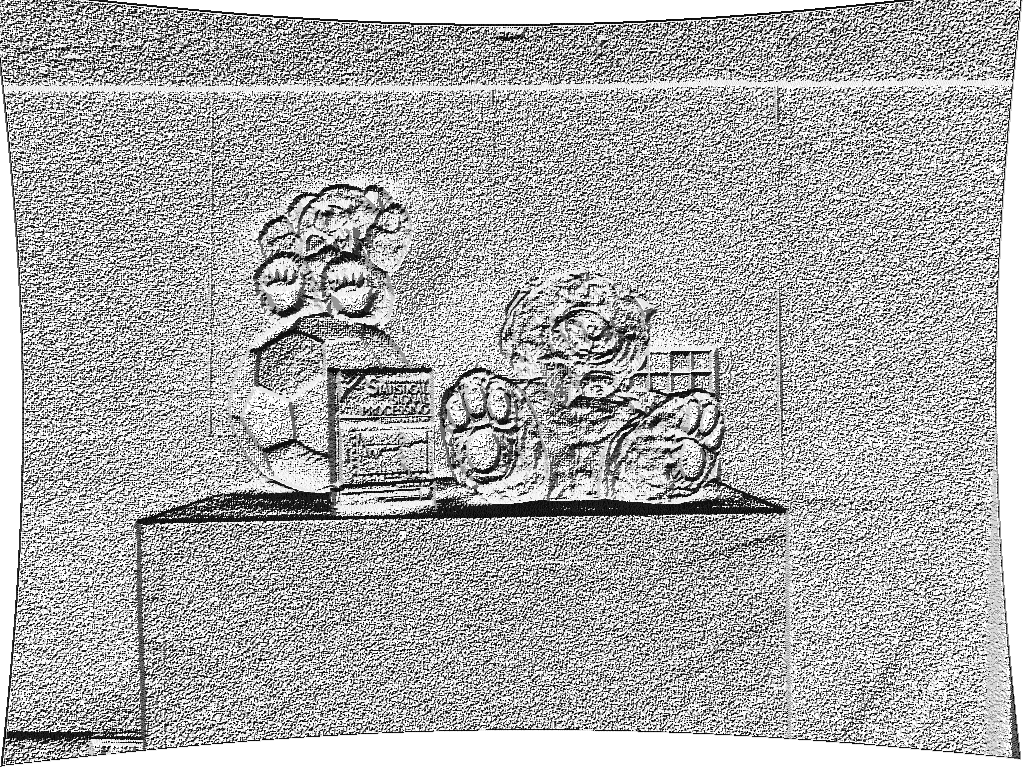

In [17]:
out_img2

In [15]:
def stereo_match(left_img, right_img, kernel, max_offset):
    # Load in both images, assumed to be RGBA 8bit per channel images
    #left_img = Image.open(left_img).convert('L')
    left = np.asarray(left_img)
    #right_img = Image.open(right_img).convert('L')
    right = np.asarray(right_img)    
    w, h = left_img.size  # assume that both images are same size   
    
    # Depth (or disparity) map
    depth = np.zeros((w, h), np.uint8)
    depth.shape = h, w
       
    kernel_half = int(kernel / 2)    
    offset_adjust = 255 / max_offset  # this is used to map depth map output to 0-255 range
      
    for y in range(5, h - 20):      
        print(".", end="", flush=True)  # let the user know that something is happening (slowly!)
        
        for x in range(5, w - 20):
            best_offset = 0
            prev_ssd = 65534
            
            for offset in range(max_offset):               
                ssd = 0
                ssd_temp = 0                            
                
                # v and u are the x,y of our local window search, used to ensure a good 
                # match- going by the squared differences of two pixels alone is insufficient, 
                # we want to go by the squared differences of the neighbouring pixels too
                for v in range(-kernel_half, kernel_half):
                    for u in range(-kernel_half, kernel_half):
                        # iteratively sum the sum of squared differences value for this block
                        # left[] and right[] are arrays of uint8, so converting them to int saves
                        # potential overflow, and executes a lot faster 
                        ssd_temp = int(left[y+v, x+u]) - int(right[y+v,(x+u)+ offset])                 
                        number=abs(ssd_temp)
                        k=0
                        for digit in str(number):
                            k += int(digit)
                        ssd += k
             
                
                # if this value is smaller than the previous ssd at this block
                # then it's theoretically a closer match. Store this value against
                # this block..
                if ssd < prev_ssd:
                    prev_ssd = ssd
                    best_offset = offset
                            
            # set depth output for this x,y location to the best match
            depth[y, x] = best_offset * offset_adjust
                                
    # Convert to PIL and save it
    Image.fromarray(depth).save('depth.png')


In [11]:
if __name__ == '__main__':
    stereo_match(left_rectified, right_rectified, 6, 30)  # 6x6 local search kernel, 30 pixel search range

...............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

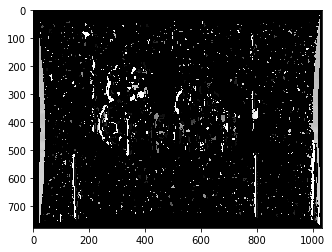

In [14]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

imgL = cv2.imread('left_rectified.png',0)
imgR = cv2.imread('right_rectified.png',0)

stereo = cv2.StereoBM_create(numDisparities=16, blockSize=15)
disparity = stereo.compute(imgL,imgR)
plt.imshow(disparity,'gray')
plt.show()